<a href="https://colab.research.google.com/github/vjaswanthvarma/numpy/blob/main/Company%20with%20regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

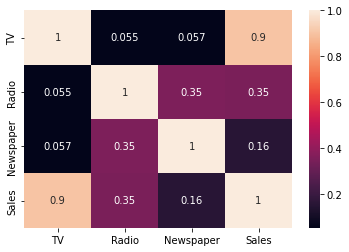

In [10]:
a=data.corr()
sns.heatmap(a,annot=True)
plt.show()

In [53]:
# Retrive the last column
x=data.iloc[:,-1].values
x=np.array(x.reshape(-1,1))


In [52]:
# Retrive the first column
y=data.iloc[:,0].values
y=np.array(y.reshape(-1,1))

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
ireg=LinearRegression()

In [15]:
# training of data
ireg.fit(x_train,y_train)

LinearRegression()

In [ ]:
plt.scatter(x_train,y_train)
plt.show()

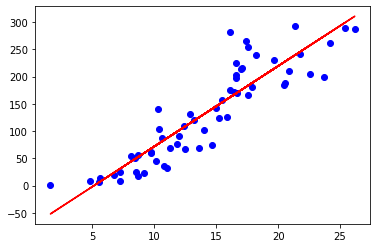

In [54]:
# Testing of data
y_pred=ireg.predict(x_test)
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,y_pred,color="red")
plt.show()


In [ ]:
data.tail(10)

In [48]:
#Evaluate the testing data 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RQSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score",r2_score(y_test,y_pred))

MAE 28.447184052850467
MSE 1405.136483787623
RQSE 37.485150176938376
r2_score 0.8167550083655044


In [36]:
#Apply the Ridge Regularization
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.5)
reg.fit(x_train,y_train)

Ridge(alpha=0.5)

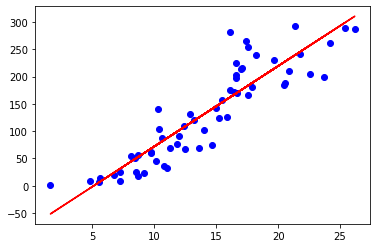

In [34]:
#predict the output after perform L2 regularization
ry_pred=reg.predict(x_test);
plt.scatter(x_test,y_test,color="blue");
plt.plot(x_test,ry_pred,color="red");
plt.show()

In [47]:
#Evaluate the model with testing data
print("MAE",mean_absolute_error(y_test,ry_pred))
print("MSE",mean_squared_error(y_test,ry_pred))
print("RSE",np.sqrt(mean_squared_error(y_test,ry_pred)))
print("r2_score",r2_score(y_test,ry_pred))


MAE 28.442690018384972
MSE 1405.0529389244925
RSE 37.484035787578854
r2_score 0.8167659035190514


In [58]:
# import lasso regularization
from sklearn.linear_model import Lasso
lreg=Lasso(alpha=0.5)
lreg.fit(x_train,y_train)


Lasso(alpha=0.5)

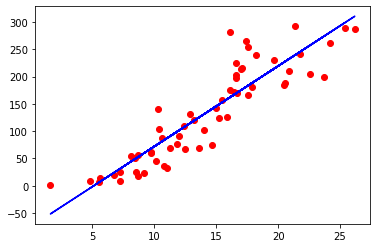

In [56]:
ly_pred=lreg.predict(x_test)
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,ly_pred,color="blue")
plt.show()

In [57]:
#Evaluate the model after testing the data
print("MAE",mean_absolute_error(y_test,ly_pred))
print("MSE",mean_squared_error(y_test,ly_pred))
print("RSE",np.sqrt(mean_squared_error(y_test,ly_pred)))
print("r2_score",r2_score(y_test,ly_pred))

MAE 28.444334420068934
MSE 1405.0832376135845
RSE 37.484439939974884
r2_score 0.8167619522423653
